#Kaggle IMDB Horror Movies dataset

I saw this Halloween-special dataset and decided to give it a try: it's one thing doing exercises on DataCamp, it's another one to actually apply all I've learned so far to a "real thing", so let's try! Here's the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset/version/1

Let's load the usual tools first:


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [23]:
horrors = pd.read_csv('IMDB Horror movies.csv')


Let's see what it is about:


In [3]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [4]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
Title                3328 non-null object
Genres               3327 non-null object
Release Date         3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
dtypes: float64(1), object(11)
memory usage: 312.1+ KB



OK, so it's just a few columns, 3328 rows but lots of information missing and most columns are of the type 'object', which is not very useful. There's some redundant information, like the year in the 'Title' column, but there's also some useful additionalinformation in the 'Plot' column. I can start with some cleanup. Please note that everything here is just the clean version of the notebook, as it took hours to find out how to do things :) 



To begin with, I can convert the 'Release Date' into timestamps, and then extract years, months and days of the week from there. To do it in one go I wrote a simple function.


In [24]:
horrors.loc[:,'Release Date'] = pd.to_datetime(horrors.loc[:,'Release Date'])

In [25]:
def datesplitter(date):
    '''extracts year, month, day and day of the week from a timestamp'''
    year = date.year
    month = date.month
    day = date.day
    weekday = date.weekday_name
    return year, month, day, weekday


And now to apply this to our dataframe: 


In [26]:
horrors[['RelYear', 'RelMonth', 'RelDay', 'RelWeekday']] = horrors.apply(lambda date: pd.Series(datesplitter(date['Release Date'])), axis = 1)

C:\____michal\WPy-3662\python-3.6.6.amd64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [27]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
0,Gut (2012),Drama| Horror| Thriller,2012-10-26,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking (2017),Horror,2017-10-21,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,2013-04-23,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus (2015),Crime| Drama| Horror,2015-04-10,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday



At this point I can drop the 'Release Date' column, as it's not necessary anymore:


In [28]:
horrors = horrors.drop('Release Date', axis = 1)


While I'm at it, I will also remove the year from the 'Title' column. The year is always written as four digits in brackets, with a whitespace between the title and the first bracket: it's enough to remove it.


In [29]:

horrors['Title'] = horrors['Title'].str.replace('\s\(\d*\)', '')


In [30]:
horrors.head()

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
0,Gut,Drama| Horror| Thriller,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss,Horror,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking,Horror,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II,Comedy| Horror| Thriller,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus,Crime| Drama| Horror,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday



Now that we have the dates nicely split, we can have some first analysis: let's see how many movies were released in which year:


In [31]:
horrors.groupby('RelYear').size()

RelYear
2012    345
2013    429
2014    523
2015    602
2016    649
2017    780
dtype: int64


It would seem like there's been more and more horror movies released every year.


<BarContainer object of 12 artists>

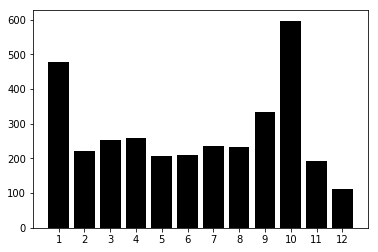

In [32]:
plt.bar(range(1,13), height = horrors.groupby('RelMonth').size(), tick_label = range(1,13), color = 'black')


October is clearly the month when most of these horror movies are being released, which makes perfect sense given the Halloween. On the other hand we don't want to be scared before X-mas, but then after the old year is gone, the horror makers come back!



We need a trick to get the release weekdays right, otherwise the days get sorted somehow randomly.


In [33]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [34]:
horrors['RelWeekday'] = pd.Categorical(horrors['RelWeekday'], categories = weekdays, ordered = True)

<BarContainer object of 7 artists>

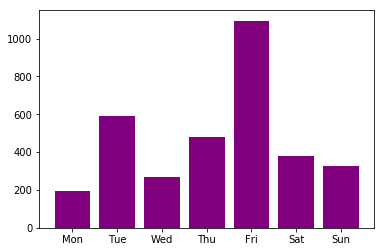

In [35]:
plt.bar(weekdays_short, height = horrors.groupby('RelWeekday').size(), color = 'purple')


Friday is definitely the most popular day to release these movies! Let's see how many are released on Friday, the 13th, and on Halloween.


In [36]:
horrors[(horrors['RelWeekday']=='Friday')&(horrors['RelDay']==13)]['Title'].size # movies released on Friday, the 13th.

57

In [37]:
horrors[(horrors['RelMonth']==10)&(horrors['RelDay']==31)]['Title'].size # movies released on Halloween

67


Now let's look at the 'Genres' column: only one value is missing there


In [38]:
horrors[horrors['Genres'].isnull() == True]

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
866,The Returned,NaN,USA,NaN,NaN,NaN,"A Horror/Thriller about a young couple, strand...",NaN,NaN,NaN,NaN,2017,1,1,Sunday



From the plot description it seems like it's a horror/thriller, so this is how I'm going to fill this empty field:


In [39]:
horrors.loc[horrors['Genres'].isnull() == True, 'Genres'] = 'Horror| Thriller'


Let's look at the info again:


In [41]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 15 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
dtypes: category(1), float64(1), int64(3), object(10)
memory usage: 367.7+ KB



There's a lot of info missing in the Movie Rating column, but as there seems to be no way to estimate how these movies were rated in various countries, I'm just going to leave it as is.
On the other hand the Review Rating, which is how the movie is rated by IMDB users, has only a few percent of the values missing. We can fill these NaNs with the median of all ratings, which is 5.0. 


In [45]:
horrors['Review Rating'].median()

5.0

In [46]:
horrors['Review Rating'] = horrors['Review Rating'].fillna(horrors['Review Rating'].median())


Let's see if the movies are getting any better, as there is more and more of them:


In [47]:
horrors.groupby('RelYear')['Review Rating'].mean()

RelYear
2012    4.739420
2013    4.851515
2014    4.921033
2015    4.967608
2016    5.187211
2017    5.422821
Name: Review Rating, dtype: float64

In [ ]:

It would seems so, looking at the mean, but...


In [48]:
horrors.groupby('RelYear')['Review Rating'].median()

RelYear
2012    4.8
2013    4.8
2014    4.9
2015    5.0
2016    5.1
2017    5.0
Name: Review Rating, dtype: float64


There's something else going on, let's see:


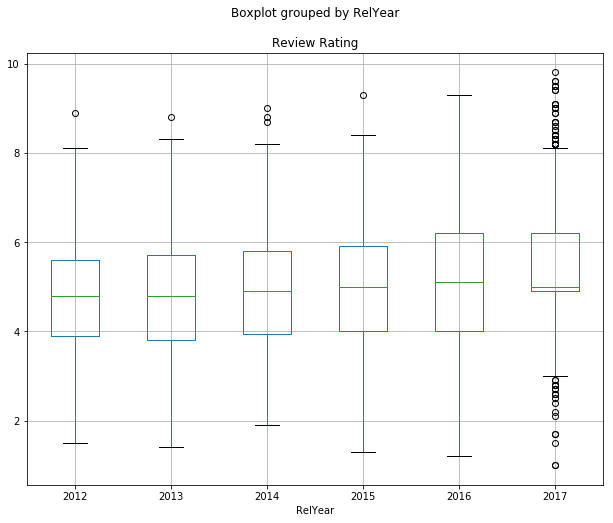

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
horrors.boxplot(column = ['Review Rating'], by = 'RelYear', ax = ax)


So the median is pretty stable, but the mean keeps growing. 


In [50]:
for year in range (2012, 2018):
    print(year, min(horrors.loc[horrors['RelYear']==year, 'Review Rating']), max(horrors.loc[horrors['RelYear']==year, 'Review Rating']))

2012 1.5 8.9
2013 1.4 8.8
2014 1.9 9.0
2015 1.3 9.3
2016 1.2 9.3
2017 1.0 9.8



We could say that with the increasing number of movies comes higher spread of review ratings' values. There must have been some very highly rated movies in 2017 to push the mean higher. 


In [51]:
horrors[horrors['Review Rating']>9.3].size

120


In 2017 there were in fact 120 movies rated higher than the maximum review rating from the year before! On the other hand...


In [52]:
horrors[(horrors['Review Rating']<1.2)&(horrors['RelYear']==2017)].size

30

...there were also 30 movies rated lower than the worst of the previous year! More horrors, more extremes. 


Now off to the next column, Movie Run Time. There's actually a lot of info missing here, roughly 17%. Let's begin with extracting the actual time from what's available. We just need to get all the digits, and then convert them to integers.


In [53]:
horrors['Minutes'] = horrors['Movie Run Time'].str.extract('(\d+)', expand = True)

In [54]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 16 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              2784 non-null object
dtypes: category(1), float64(1), int64(3), object(11)
memory usage: 393.7+ KB


In [55]:
horrors['Minutes'] = horrors.loc[horrors['Minutes'].notnull(), 'Minutes'].astype('int')

In [56]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 16 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              2784 non-null float64
dtypes: category(1), float64(2), int64(3), object(10)
memory usage: 393.7+ KB



There's roughly 17% of values missing in the 'Movie Run Time'. Let's see if it would make sense to fill them with some averaged value:


In [57]:
horrors['Minutes'].median()

90.0

In [58]:
horrors['Minutes'].mean()

90.92420977011494

In [59]:
horrors.groupby('RelYear')['Minutes'].median()

RelYear
2012    89.0
2013    89.0
2014    90.0
2015    90.0
2016    89.0
2017    90.0
Name: Minutes, dtype: float64

In [60]:
horrors.groupby('RelYear')['Minutes'].mean()

RelYear
2012    90.528814
2013    90.438287
2014    91.154013
2015    90.822430
2016    91.762250
2017    90.550459
Name: Minutes, dtype: float64


Looks like 90 minutes really is a standard run time for a movie (it was like that back in the VHS days, you could fit two average movies on a 180 minutes tape! :) I'm going to replace the NaNs with the median:


In [61]:
horrors['Minutes'] = horrors['Minutes'].fillna(horrors['Minutes'].median())


Now I can drop the original 'Movie Run Time' column:


In [62]:
horrors = horrors.drop('Movie Run Time', axis = 1)

In [63]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 15 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
dtypes: category(1), float64(2), int64(3), object(9)
memory usage: 367.7+ KB



Back to the 'Genres' column: it seems like almost every movie on this list is classified as more than one genre. After some experimenting I came up with a function which does the one-hot encoding, creating a column for each genre and then filling it with 1 when a given movie is classified as that genre: later I just need to fill the resulting NaNs with zeros. To do that we need to import RegEx.


In [64]:
import re

In [65]:
def splitter(dataframe, column):
    '''extracts single words (genres) in each row, returns 1 in a column corresponding to the found genre'''
    for row in dataframe.index:
        for word in re.findall('\w+', dataframe.loc[row, column]):
            dataframe.loc[row, word] = 1
    return dataframe

In [66]:
horrors = splitter(horrors, 'Genres')

In [67]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 39 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
Drama                531 non-null float64
Horror               3328 non-null float64
Thriller             1379 non-null float64
Comedy               513 non-null float64
Crime                121 non-null float64
Action               336 non-null float64
Sci     


Two problems: lots of NaNs, and 'Sci Fi' was interpreted as two separate words, creating two columns. I will simply copy one of the two columns as 'SciFi' and then drop the other two.


In [68]:
horrors['SciFi'] = horrors['Sci']

In [69]:
horrors = horrors.drop(['Sci', 'Fi'], axis = 1)

In [70]:
horrors.columns

Index(['Title', 'Genres', 'Release Country', 'Movie Rating', 'Review Rating',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'RelYear',
       'RelMonth', 'RelDay', 'RelWeekday', 'Minutes', 'Drama', 'Horror',
       'Thriller', 'Comedy', 'Crime', 'Action', 'Mystery', 'Adventure',
       'Fantasy', 'Romance', 'War', 'Western', 'Sport', 'Animation', 'History',
       'Musical', 'Music', 'Family', 'Biography', 'Adult', 'Reality', 'TV',
       'SciFi'],
      dtype='object')

In [71]:
horrors.loc[:,'Drama':'SciFi'] = horrors.loc[:,'Drama':'SciFi'].fillna(0)

In [72]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 38 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
Drama                3328 non-null float64
Horror               3328 non-null float64
Thriller             3328 non-null float64
Comedy               3328 non-null float64
Crime                3328 non-null float64
Action               3328 non-null float64
Myst


As said at the beginning, there is some interesting info in the 'Plot' column. It seems to be always starting with "Directed by ". Using RegEx, we can extract the names that come after those words, but before the end of the first sentence (or actually before the beginning of the second one, which always start with "With ":


In [73]:
pattern = '(?<=by\s)(.*?)(?:. With)' #non-greedy, any number of characters, preceded by the string "by ", followed by ". With"

horrors['Director'] = horrors['Plot'].str.extract(pattern, expand = True)


Another operation on string is splitting the cast into single actors. There are too many to do the one-hot encoding, but we can convert the strings to lists of names, using the fact that they're always separated by the same symbol.


In [74]:
horrors['Cast'] = horrors['Cast'].str.split('(?:[|])')

In [75]:
horrors.sample(3)

,Title,Genres,Release Country,Movie Rating,Review Rating,Plot,Cast,Language,Filming Locations,Budget,...,History,Musical,Music,Family,Biography,Adult,Reality,TV,SciFi,Director
411,Abduction,Action| Comedy| Drama| Fantasy| Horror| Sci-F...,USA,NaN,3.1,"Directed by Maurice Smith, Mol Smith. With Kar...","[Karolina Antosik, Tessa McGinn, Kemal Yildiri...",English|English,"England, UK","£43,000",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"Maurice Smith, Mol Smith"
1665,60 Seconds to Die,Horror,USA,NaN,6.8,"Directed by Eric Alfonsi, James Balsamo, David...","[Jane Ackermann, Lia Alvarez, Siff Andersson, ...",English|Spanish,"Flint, Michigan, USA",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Eric Alfonsi, James Balsamo, David Bryant"
181,Scream for Summer,Horror,USA,NaN,5.0,Directed by Cheyenne Gordon. With Mary Watters...,"[Mary Watters, Tyler Riley, Alicia M. Clark, C...",English,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cheyenne Gordon



Now that all the casts are lists, we can simply add them together...


In [76]:
actors = horrors[horrors['Cast'].notnull()]['Cast'].sum() #NaNs must be filtered out for this to work

In [ ]:

...and see who appears frequently in these movies:


In [77]:
actors_freq = {name:actors.count(name) for name in actors}

In [78]:
max(actors_freq.values())

29


Looks like someone starred in 29 of our movies!


In [79]:
{name:actors_freq[name] for name in actors_freq.keys() if actors_freq[name] >= 12} 

{'Brinke Stevens': 18,
 'Shawn C. Phillips': 14,
 'Suzi Lorraine': 16,
 'Bill Oberst Jr.': 18,
 'Felissa Rose': 14,
 'Lloyd Kaufman': 29,
 'Kane Hodder': 16,
 'Bill Moseley': 18,
 'Eric Roberts': 28,
 'Tiffany Shepis': 15,
 'Lynn Lowry': 12,
 'Lee Bane': 13,
 'Debbie Rochon': 23,
 'Linnea Quigley': 13,
 'Jessica Cameron': 13,
 'Maria Olsen': 21,
 'Mindy Robinson': 15,
 'Ron Jeremy': 13,
 'Tony Todd': 14,
 'Elissa Dowling': 17,
 'Lance Henriksen': 15,
 'Doug Jones': 12,
 'Ray Wise': 12,
 'Larry Fessenden': 15}


I filtered by >=12, which means 2 movies each year, on average. I can use this to do some one-hot encoding of these most popular actors.


Here's a function (pretty slow, and I hope I can find a way to make it faster) that sets a True/False flag in a dedicated column, to later filter the movies where these actors appear:

In [85]:
def actorfinder(item, name):
    if name in item:
        answer = 1
    else:
        answer = 0
    return answer

In [86]:
top_stars = [name for name in actors_freq.keys() if actors_freq[name] >= 12 ]

In [87]:
for name in top_stars:
    horrors[name] = horrors[horrors['Cast'].notnull()].apply(lambda x: pd.Series(actorfinder(x['Cast'], name)), axis = 1)


Lloyd Kaufman and Eric Roberts are the most frequently appearing in our list.


In [137]:
horrors[horrors['Lloyd Kaufman']==1]['Review Rating'].median()

5.5

In [138]:
horrors['Review Rating'].median()

5.0


No wonder Lloyd Kaufman appears in so many movies: his presence guarantees it's gonna be good.. or it's the other way round, he chooses wisely the movies to star in. One way or the other, the movies with Lloyd Kaufman have ratings 10% above the global median.


In [139]:
horrors[horrors['Eric Roberts']==1]['Review Rating'].median()

3.5


We can't say the same about Eric Roberts, though.



Now that I have these most popular actors one-hot encoded, it's enough to sum the columns to find the movies where more than one of them appears.


In [114]:
horrors.columns

Index(['Title', 'Genres', 'Release Country', 'Movie Rating', 'Review Rating',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'RelYear',
       'RelMonth', 'RelDay', 'RelWeekday', 'Minutes', 'Drama', 'Horror',
       'Thriller', 'Comedy', 'Crime', 'Action', 'Mystery', 'Adventure',
       'Fantasy', 'Romance', 'War', 'Western', 'Sport', 'Animation', 'History',
       'Musical', 'Music', 'Family', 'Biography', 'Adult', 'Reality', 'TV',
       'SciFi', 'Director', 'Brinke Stevens', 'Shawn C. Phillips',
       'Suzi Lorraine', 'Bill Oberst Jr.', 'Felissa Rose', 'Lloyd Kaufman',
       'Kane Hodder', 'Bill Moseley', 'Eric Roberts', 'Tiffany Shepis',
       'Lynn Lowry', 'Lee Bane', 'Debbie Rochon', 'Linnea Quigley',
       'Jessica Cameron', 'Maria Olsen', 'Mindy Robinson', 'Ron Jeremy',
       'Tony Todd', 'Elissa Dowling', 'Lance Henriksen', 'Doug Jones',
       'Ray Wise', 'Larry Fessenden'],
      dtype='object')

In [127]:
horrors['TopStars'] = horrors.loc[:,'Brinke Stevens':].sum(axis = 1)

In [133]:
horrors['TopStars'].unique()

array([0., 1., 2., 3., 5.])

In [ ]:

Let's have a look at the movie with most of the popular actors in it:


In [132]:
horrors[horrors['TopStars'] == horrors['TopStars'].max()]

,Title,Genres,Release Country,Movie Rating,Review Rating,Plot,Cast,Language,Filming Locations,Budget,...,Maria Olsen,Mindy Robinson,Ron Jeremy,Tony Todd,Elissa Dowling,Lance Henriksen,Doug Jones,Ray Wise,Larry Fessenden,TopStars
892,Disciples,Horror,USA,R,2.1,"Directed by Joe Hollow. With Tom Lodewyck, Ton...","[Tom Lodewyck, Tony Todd, Linnea Quigley, Angu...",English,"Florida, USA","$115,000",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0



It looks like it didn't help much: the rating is pretty low...


In [136]:
horrors[horrors['TopStars']>1]['Review Rating'].median()

5.0


...but in general these movies don't stand out from the crowd, the median of the review rating is in line with the overall median.


In [ ]:

Let's go back to another column that has some NaNs: 'Language'.


In [141]:

horrors.loc[horrors['Language'].isnull(), 'Release Country'].unique()


array(['Mexico', 'USA', 'Russia', 'UK', 'Spain', 'Thailand', 'India',
       'Italy', 'Canada', 'South Korea', 'Taiwan', 'Japan'], dtype=object)


I believe we can safely assume that the movies made in the USA and in the UK are in English: it's not 100% certain, but very probable. I will fill these NaNs with 'English' then.


In [148]:
horrors.loc[(horrors['Language'].isnull())&((horrors['Release Country'] == 'USA')|(horrors['Release Country'] == 'UK')), 'Language'] = 'English'

In [152]:
horrors.loc[horrors['Language'].isnull(), ['Title', 'Release Country']]

,Title,Release Country
67,La Niña de la Mina,Mexico
184,Shopping Tour,Russia
486,Psychophonia,Spain
606,Realms,Thailand
685,Mona_Darling,India
887,Blood on Méliès' Moon,Italy
1603,Nayaki,India
1998,Infected,Canada
2217,Treehouse,South Korea
2260,Mon Mon Mon Monsters,Taiwan



As for the other movies, it's hard to tell for sure whether their titles appear in translated version, or they were actually released in English (this includes Canada, as the two movies might have been done in French). I will just set the language of the Mexican movie to Spanish, and the rest to 'unknown'.


In [153]:
horrors.loc[horrors['Title'] == 'La Niña de la Mina', 'Language'] = 'Spanish'

In [154]:
horrors.loc[horrors['Language'].isnull(), 'Language'] = 'unknown'

In [156]:
horrors.groupby('Language').size()

Language
Aboriginal|English                              1
Albanian|Albanian                               2
Arabic                                          1
Arabic|English                                  2
Arabic|English|French                           1
Basque                                          1
Bengali                                         3
Bulgarian|English                               1
Cantonese                                       4
Cantonese|Japanese                              1
Cantonese|Mandarin                              3
Cantonese|Mandarin|Malay                        1
Catalan|English                                 1
Catalan|Spanish|German|English                  1
Chinese                                        10
Chinese|Mandarin                                2
Czech                                           1
Danish                                          4
Danish|Danish                                   1
Danish|English|Norwegian|Swedish|Romanian


Wow, should've looked into that earlier! Some of the movies have more than one language. Not sure what it means: do they have subtitled parts in another language, or were released in multiple versions? I'm tempted to do the one-hot encoding again, although it would mean having a lot of additional columns to deal with. Let's see how many languages there are in total, by doing the same trick as we did with the cast: split to lists, then counting.


In [157]:
horrors['Languages'] = horrors['Language'].str.split('(?:[|])')

In [158]:
horrors['Languages']

0                  [English]
1                  [English]
2                  [English]
3                  [English]
4                  [Italian]
5                  [English]
6                  [English]
7                 [Japanese]
8                  [English]
9                    [Hindi]
10                [Mandarin]
11                 [English]
12                 [English]
13                 [English]
14               [Malayalam]
15                 [English]
16                 [English]
17                 [English]
18                 [English]
19                 [English]
20                 [English]
21                 [English]
22                 [English]
23       [Filipino, Tagalog]
24                 [English]
25                 [English]
26                 [English]
27                 [English]
28                 [English]
29                 [English]
                ...         
3298               [English]
3299    [English, Ukrainian]
3300              [Japanese]
3301          

In [159]:
languages = horrors['Languages'].sum()

In [160]:
len(languages)

3708

In [162]:
len(set(languages))

78

In [ ]:

We have 78 languages in total, let's see what the frequency is.


In [163]:
{language:languages.count(language) for language in languages}

{'English': 2690,
 'Italian': 27,
 'Japanese': 104,
 'Hindi': 45,
 'Mandarin': 25,
 'Malayalam': 16,
 'Filipino': 44,
 'Tagalog': 41,
 'Tamil': 40,
 'Indonesian': 28,
 'Spanish': 153,
 'Malay': 15,
 'Turkish': 33,
 'Russian': 29,
 'German': 55,
 'Thai': 40,
 'Telugu': 19,
 'French': 42,
 'Greek': 3,
 'Urdu': 3,
 'Chinese': 16,
 'Swedish': 22,
 'Korean': 24,
 'Latvian': 1,
 'Romanian': 7,
 'unknown': 12,
 'Cantonese': 12,
 'Danish': 9,
 'Serbian': 5,
 'Dutch': 8,
 'Gallegan': 1,
 'Portuguese': 20,
 'Icelandic': 2,
 'Kannada': 11,
 'Hebrew': 3,
 'Czech': 1,
 'Min Nan': 2,
 'Divehi': 1,
 'Vietnamese': 7,
 'Finnish': 3,
 'Albanian': 4,
 'Marathi': 3,
 'Bengali': 3,
 'Norwegian': 9,
 'Slovak': 2,
 'Slovenian': 2,
 'Guarani': 1,
 'Hungarian': 7,
 'Polish': 3,
 'Sinhalese': 1,
 'Catalan': 5,
 'Greenlandic': 1,
 'Scanian': 1,
 'Esperanto': 1,
 'Arabic': 8,
 'Visayan': 1,
 'Lao': 1,
 'Estonian': 1,
 'Tulu': 1,
 'Latin': 6,
 'Quechua': 1,
 'Aboriginal': 1,
 'Persian': 3,
 'Bulgarian': 3,
 'Flemi


Some of them must be secondary languages (as in: used in the movie, but the main language is something else), unless there really are horrors done in Latin, Sanskrit and Aramaic! If that's the case, they either rely mostly on the visuals, or their producers didn't really care about the revenues and targeted a very limited audience :)

Let's go back to the original grouping and focus on the languages with many movies done in that language only.


In [202]:
language_freq = horrors['Language'].value_counts().to_dict()

In [203]:
language_freq

{'English': 2479,
 'Spanish': 97,
 'Japanese': 77,
 'Hindi': 37,
 'Thai': 34,
 'Filipino|Tagalog': 34,
 'English|Spanish': 30,
 'Turkish': 30,
 'Tamil': 29,
 'German': 28,
 'Indonesian': 24,
 'Korean': 19,
 'Russian': 14,
 'French': 14,
 'Malay': 13,
 'unknown': 12,
 'Portuguese': 12,
 'Telugu': 11,
 'Italian': 10,
 'Chinese': 10,
 'Swedish': 10,
 'Kannada': 10,
 'English|English': 9,
 'Malayalam': 9,
 'Mandarin': 9,
 'English|Russian': 8,
 'Spanish|English': 7,
 'English|Italian': 7,
 'Japanese|English': 7,
 'English|Japanese': 6,
 'English|German': 5,
 'English|French': 5,
 'Vietnamese': 5,
 'Cantonese': 4,
 'Dutch': 4,
 'Danish': 4,
 'English|American Sign Language': 3,
 'Mandarin|Cantonese': 3,
 'English|Portuguese': 3,
 'English|Hungarian': 3,
 'Cantonese|Mandarin': 3,
 'English|Indonesian': 3,
 'Tamil|Telugu': 3,
 'Norwegian': 3,
 'Urdu': 3,
 'German|English': 3,
 'Filipino|Tagalog|English': 3,
 'English|Thai': 3,
 'Bengali': 3,
 'English|Serbian': 3,
 'English|Ukrainian': 3,
 'M

In [212]:
top_languages = [language for language in language_freq.keys() if language_freq[language] >= 10]

In [224]:
for language in top_languages:
    rating_median = horrors.loc[horrors['Language'] == language, 'Review Rating'].median()
    print ("Language: {} / Review rating median: {:.1f}".format(language, rating_median))

Language: English / Review rating median: 5.0
Language: Spanish / Review rating median: 5.0
Language: Japanese / Review rating median: 5.9
Language: Hindi / Review rating median: 4.9
Language: Thai / Review rating median: 5.6
Language: Filipino|Tagalog / Review rating median: 5.8
Language: English|Spanish / Review rating median: 5.0
Language: Turkish / Review rating median: 5.7
Language: Tamil / Review rating median: 5.7
Language: German / Review rating median: 5.3
Language: Indonesian / Review rating median: 6.4
Language: Korean / Review rating median: 5.8
Language: Russian / Review rating median: 5.0
Language: French / Review rating median: 5.5
Language: Malay / Review rating median: 5.1
Language: unknown / Review rating median: 5.0
Language: Portuguese / Review rating median: 6.2
Language: Telugu / Review rating median: 6.5
Language: Italian / Review rating median: 5.2
Language: Chinese / Review rating median: 4.8
Language: Swedish / Review rating median: 5.3
Language: Kannada / Rev


Turns out that movies in Kannada language (which as Wikipedia tells me is _"a Dravidian language spoken predominantly by Kannada people in India, mainly in the state of Karnataka, and by significant linguistic minorities in the states of Andhra Pradesh, Telangana, Tamil Nadu, Maharashtra, Kerala, Goa and abroad."_) are much better than the average. It could also mean, though, that the Kannada speakers on IMDB are more generous in their ratings than others.


Let's see if there are significant differences in movie run time by language:

In [227]:
horrors[horrors['Language'].isin(top_languages)].groupby('Language')['Minutes'].median()

Language
Chinese              93.5
English              90.0
English|Spanish      86.0
Filipino|Tagalog     95.0
French               90.0
German               90.0
Hindi               119.0
Indonesian           90.0
Italian              83.5
Japanese             90.0
Kannada             123.0
Korean               97.0
Malay                90.0
Portuguese           95.0
Russian              90.0
Spanish              90.0
Swedish              90.0
Tamil               122.0
Telugu              123.0
Thai                 91.5
Turkish              90.0
unknown              95.5
Name: Minutes, dtype: float64


The movies in Kannada and Telugu are both highly rated and pretty long. Let's see if there's some significant correlation between the length and the review rating:


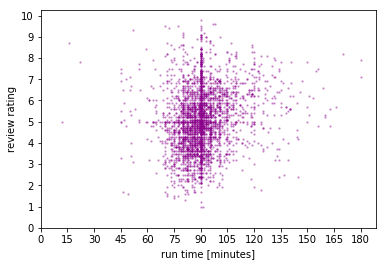

In [242]:
fig, ax = plt.subplots()
plt.scatter(horrors['Minutes'], horrors['Review Rating'], s = 2, c = 'darkmagenta', alpha = 0.3)
plt.xlabel("run time [minutes]")
plt.xticks(range(0,195,15))
plt.ylabel("review rating")
plt.yticks(range(0,11,1))
plt.show()


Nope, no clear link between the length of the movie and the rating. There's something interesting in the chart, though: two clearly visible lines corresponding to 90 minutes run time and 5.0 rating. These are not just median values:


In [252]:
horrors.loc[horrors['Minutes']==90.0, 'Minutes'].size

781

In [254]:
horrors.loc[horrors['Review Rating']==5.0, 'Review Rating'].size

335

In [245]:
from scipy.stats import mode

In [246]:
horrors['Minutes'].mode()

0    90.0
dtype: float64

In [247]:
horrors['Review Rating'].mode()

0    5.0
dtype: float64


These are also mode values, which is a result of imputing these original NaNs with median values for run time and review ratings.


_TO BE CONTINUED..._